In [17]:
def my_dft(h,tau):
    N=len(h)
    H=zeros(N,dtype="complex")
    for n in range(N):
        for k in range(N):
                H[n] += h[k]*exp(2j*pi*k*n/N)
    H*=tau
    return H

In [18]:
def my_antidft(H,tau):
    N=len(H)
    h=zeros(N,dtype="complex")
    for n in range(N):
         for k in range(N):
             h[n] += H[k]*exp(-2j*pi*k*n/N)
    H *= 1/tau/N
    return h

<BarContainer object of 32 artists>

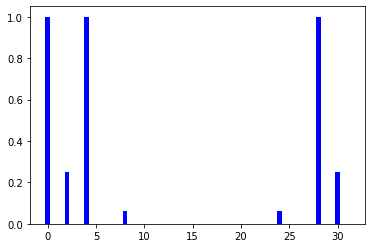

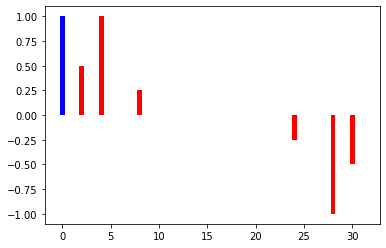

In [19]:
from pylab import *
#supponiamo che siano state definite
#sopra le funzioni my_dft e my_antidft

tau=1/32.
T=1.
A=1.
f0=2.
f1=2*f0
f2=4*f0

t=arange(0,T,tau)
N=len(t) #o anche N=T/tau
funct = 1 + A*(sin(2*pi*f0*t)+2*sin(2*pi*f1*t)+0.5*sin(2*pi*f2*t))
Transf = my_dft(funct,tau)

freq=arange(N)/tau/N
bar(freq,abs(Transf)**2,width=0.5,align="center",color="b")

figure(2)
                                                       
bar(freq,Transf.real,width=0.5,align="center",color="b",label="Reale")
bar(freq,Transf.imag,width=0.5,align="center",color="r",label="Immaginaria")

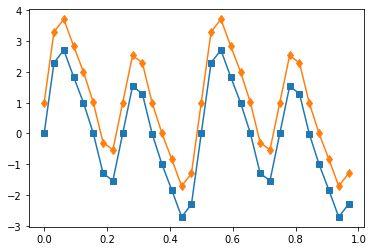

In [20]:
#eliminiamo la componente a frequenza zero
Transf.real[0] = 0

antiTransf = my_antidft(Transf,tau)
plot(t,antiTransf,"-s",label="funct modificata") 
plot(t,funct,"-d",label="funct originale")

<BarContainer object of 40 artists>

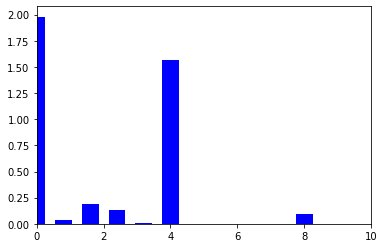

In [21]:
#supponiamo che siano state definite
#sopra le funzioni my_dft e my_antidft

tau=1/32
T=1.*1.25
A=1
f0=2.
f1=2*f0
f2=4*f0

t=arange(0,T,tau)
N=len(t) #o anche N=T/tau
funct = 1 + A*(sin(2*pi*f0*t)+2*sin(2*pi*f1*t)+0.5*sin(2*pi*f2*t))
Transf = my_dft(funct,tau)

freq=arange(N)/tau/N
xlim(0,10)  
bar(freq,abs(Transf)**2,width=0.5,align="center",color="b")

#xlim(0,10)                                                       
#bar(freq,Transf.real,width=0.5,align="center",color="b",label="Reale")

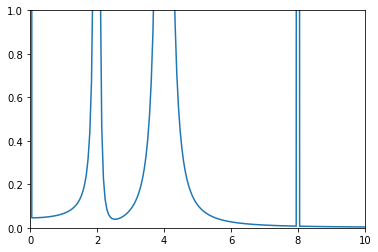

In [22]:
#supponiamo che siano state definite
#sopra le funzioni my_dft e my_antidft

tau=1/32
T=1*19.6
A=1
f0=2.
f1=2*f0
f2=4*f0

t=arange(0,T,tau)
N=len(t) #o anche N=T/tau
funct = 1 + A*(sin(2*pi*f0*t)+2*sin(2*pi*f1*t)+0.5*sin(2*pi*f2*t))
Transf = my_dft(funct,tau)

freq=arange(N)/tau/N
xlim(0,10)  
ylim(0,1)
#bar(freq,abs(Transf)**2,width=0.5,align="center",color="b")
plot(freq,abs(Transf)**2)


<BarContainer object of 40 artists>

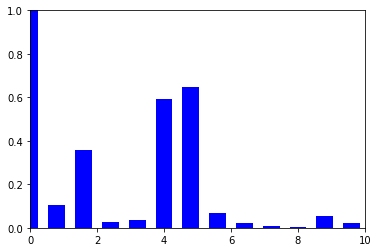

In [23]:
#supponiamo che siano state definite
#sopra le funzioni my_dft e my_antidft

tau=1/32
T=1.
A=1
f0=2.
f1=4.4
f2=9

t=arange(0,T*1.25,tau)
N=len(t) #o anche N=T/tau
funct = 1 + A*(sin(2*pi*f0*t)+2*sin(2*pi*f1*t)+0.5*sin(2*pi*f2*t))
Transf = my_dft(funct,tau)

freq=arange(N)/tau/N
xlim(0,10) 
ylim(0,1)
#plot(freq,abs(Transf)**2)
bar(freq,abs(Transf)**2,width=0.5,align="center",color="b")
#xlim(0,10)                                                       
#bar(freq,Transf.real,width=0.5,align="center",color="b",label="Reale")

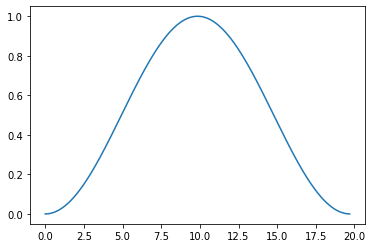

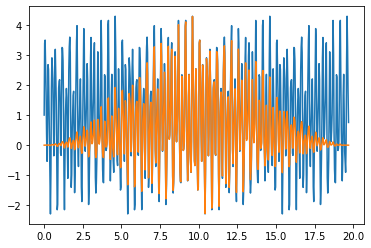

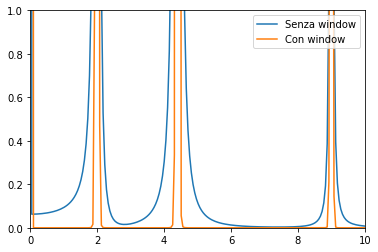

In [30]:
 #definiamo la funzione finestra
tau=1/32
T=1*19.7
A=1
f0=2.
f1=4.4
f2=9

t=arange(0,T,tau)
N=len(t) #o anche N=T/tau
funct = 1 + A*(sin(2*pi*f0*t)+2*sin(2*pi*f1*t)+0.5*sin(2*pi*f2*t))    

r=2*pi*t/(T)
han=0.5-0.5*cos(r)


funct_windowed=funct*han
Transf=my_dft(funct,tau)
Transf_window=my_dft(funct_windowed,tau)
freq=arange(N)/tau/N
#facciamo i grafici
plot(t,han)

figure(2)
plot(t,funct)
plot(t,funct_windowed)

figure(3)
xlim(0,10)
ylim(0,1)
plot(freq,abs(Transf)**2,label="Senza window")
plot(freq,abs(Transf_window)**2,label="Con window")
legend()